## Import

In [1]:
%matplotlib notebook

import os, sys, datetime
import matplotlib.pyplot as plt
import numpy as np

#sys.path.append(r"D:\Code")
import qcodes as qc
# import characterizations.characterizations.mobility as mobility
from qcodes.dataset.data_set import DataSet, load_by_id
from qcodes.dataset.experiment_container import Experiment
import numpy as np
import scipy as sp
import scipy.optimize as spo
import matplotlib.pyplot as plt

from qcodes.dataset.database import initialise_database, get_DB_location

qc.config["core"]["db_location"] = r'D:\OneDrive\BF3\Data\experiments_2018-10.db'
initialise_database()

## Dynes DOS

### Definitions

In [116]:
# Lit.: https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.41.1509
def rho_Dynes(E, Gamma, Delta):
    return np.abs(np.real((E - 1j*Gamma) / np.sqrt((E - 1j*Gamma)**2 - Delta**2 + 0j)));

def fit_Dynes(E, Gamma, Delta, C_N, E_offset):
    return C_N * rho_Dynes(E + E_offset, Gamma, Delta);

def rho_BCS(E, Delta):
    return np.real(np.abs(E) / np.sqrt(E**2 - Delta**2 + 0j));

def Fermi_Dirac(E, E_F, T):
    k_B = 8.6173303E-5; # k_B in eV
    return (np.exp((E - E_F)/(k_B * T)) + 1)**(-1);

#### Debug

<IPython.core.display.Javascript object>


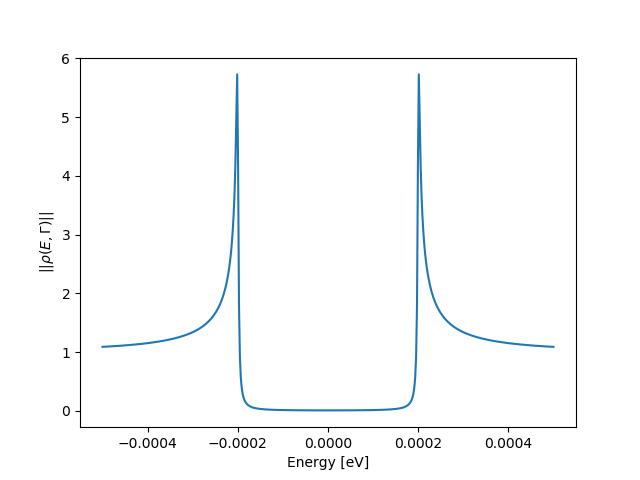

In [69]:
# Plot Dynes DOS
E = np.linspace(-500E-6, 500E-6, 500);
Delta = 200E-6;
Gamma = 0.01 * Delta;

rho_d = rho_Dynes(E, Gamma, Delta);

plt.figure('dynes_theory_plot');
plt.plot(E, rho_d);
plt.xlabel('Energy [eV]');
plt.ylabel('$||\\rho(E, \\Gamma)||$');

<IPython.core.display.Javascript object>


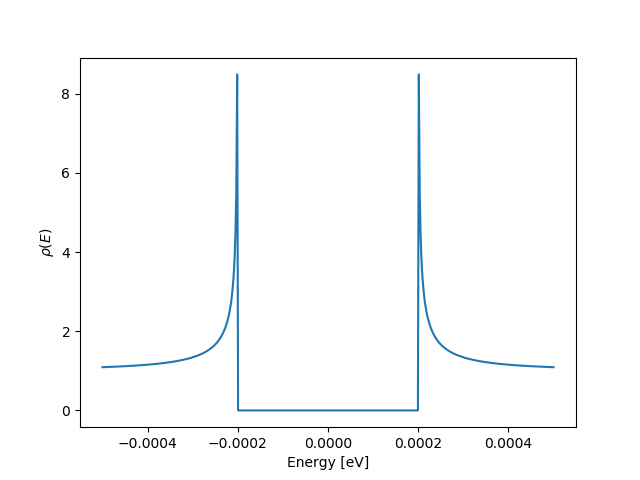

In [120]:
# Plot BCS DOS
E = np.linspace(-500E-6, 500E-6, 500);
Delta = 200E-6;

rho_b = rho_BCS(E, Delta);

plt.figure('bcs_theory_plot');
plt.plot(E, rho_b);
plt.xlabel('Energy [eV]');
plt.ylabel('$\\rho(E)$');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


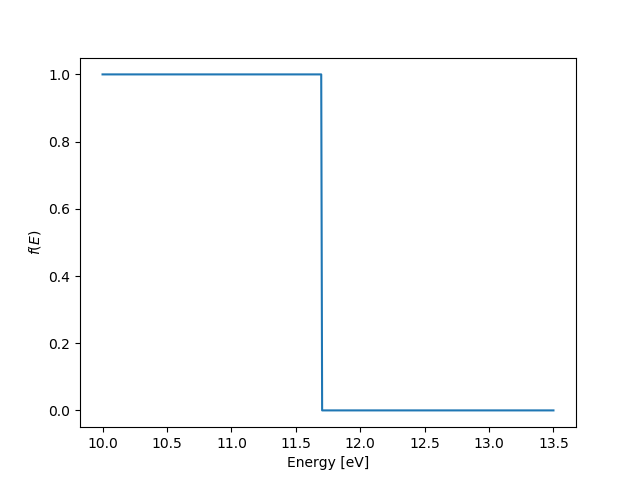

In [11]:
# Plot Fermi-Dirac
E = np.linspace(10, 13.5, 500);
E_F = 11.7; # eV
T = 100E-3;

f = Fermi_Dirac(E, E_F, T);

plt.figure('fermi-dirac_distribution');
plt.plot(E, f);
plt.xlabel('Energy [eV]');
plt.ylabel('$f(E)$');

### Fitting

In [118]:
runid = 79;
dat = load_by_id(runid)
exp = Experiment(dat.path_to_db)
exp.exp_id = dat.exp_id

Vb = np.array(dat.get_values('lockin_dc')).reshape(-1);
G = np.array(dat.get_values('conductance')).reshape(-1);

p0_guess = [0.001, 200E-6, 0.001, -0.001];
[p_fit, _] = spo.curve_fit(fit_Dynes, Vb, G, p0 = p0_guess);

print(p_fit)

plt.figure('Dynes_DOS_fit');
plt.plot(Vb, G, '.');
plt.plot(Vb, fit_Dynes(Vb, *p_fit))
plt.xlabel('Bias (mV)');

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.